# UNDERSTANDING EXPERIMENTAL DATA

This chapter is about `understanding experimental data`. 

We will

* make extensive use of `plotting to visualize the data`, and 

* show how to use `linear regression` to build a model of experimental data.

## 1 The Behavior of Springs

Springs are wonderful things. When they are compressed or stretched by some force,they store energy. When that force is no longer applied they release the stored energy. This property allows them to smooth the ride in cars, help mattresses conform to our bodies, retract seat belts, and launch projectiles.

In 1676 the British physicist Robert Hooke formulated **Hooke’s law** of elasticity。 

$$F = -kx$$

* $F$ is the `restoring force` exerted by the spring on whatever is pulling its free end.

* The `direction of the restoring force` is `opposite` to that of the `displacement`. 

* The constant of proportionality, `k`, is called <b>the spring constant</b>. 

* All springs have an <b>elastic limit</b>, beyond which the law fails. 

Knowing the <b>spring constant</b> of a particular spring can be <b>a matter of some import</b>

Generations of physics students have learned to `estimate spring constants` using an `experimental apparatus` similar to that pictured here. 

![](./img/spring.PNG) 

* We `start` with a spring with `no weight` on it, and measure the distance to the bottom of the spring from the top of the stand.

* We then `hang a known mass` on the spring, and wait for it to stop moving. At this point, the force stored in the spring is the force exerted on the spring by the weight hanging from it.This is the value of $F$ in `Hooke’s law`. 

  * We again measure the `distance` from the bottom of the spring to the top of the stand. The `difference` between this distance and the distance before we hung the weight then becomes the value of  $x$ in `Hooke’s law`. 

We know that the force, $F$, being exerted on the spring is equal to the mass, $m$, multiplied by the acceleration due to gravity, $g$ ( $9.81 m/s^2$) is a pretty good approximation of $g$ on this planet), so we substitute $m*g$ for $F$. 

By simple algebra,we know that $k = -(m*g)/x$


### 1.1 `Robust` experiment

A more **robust experiment** is to hang a **series** of increasingly heavier weights on the spring, measure the stretch of the spring each time, and plot the results.

We ran such an experiment,and typed the results into a file named `./data/springData.csv`:


In [ ]:
%%file ./data/springData.csv
Distance(m),Mass(kg)
0.0865,0.1
0.1015,0.15
0.1106,0.2
0.1279,0.25
0.1892,0.3
0.2695,0.35
0.2888,0.4
0.2425,0.45
0.3465,0.5
0.3225,0.55
0.3764,0.6
0.4263,0.65
0.4562,0.7
0.4502,0.75
0.4499,0.8
0.4534,0.85
0.4416,0.9
0.4304,0.95
0.437,1.0

The `getData` function reads data from a file such as the one we saved, and returns lists containing the `distances` and `masse`s.

* distances = []

* masses = []

In [ ]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()# Distance(m),Mass(kg)
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)


inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
print(masses)
print(distances)

The `plotData`function uses  the experimental data `masses, distances` from the file and then produces the plot 

* [Unit2-2-PLOTTING-USING-MATPLOTLIB](./Unit2-2-PLOTTING-USING-MATPLOTLIB.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(masses, distances):
    masses = np.array(masses)
    distances = np.array(distances)
    
    # mass to force
    forces = masses*9.81
    # line type: 'r*
    plt.plot(forces, distances, 'r*')
    
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    
    plt.savefig('./img/MeasuredDisplacementofSpring.svg') # save figure in SVG

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
plotData(masses, distances)


This is`not` what `Hooke’s law` predicts.

Hooke’s law tells us that the distance should increase <b style="color:blue">linearly</b> with the mass, i.e., the points should lie on a <b style="color:blue">straight line</b> the slope of which is determined by the spring constant.

Of course, we know that when we take `real measurements` the experimental data are rarely a `perfect match for the theor`y.

**Measurement error** is to be expected, so we should expect the points to lie `around a line` rather than on it.

It would be nice to see <b style="color:blue">a line</b> that represents our <b style="color:blue">best guess</b> of where the points would have been if we had no measurement error. 

### 1.2 Using Linear Regression to Find a Fit

Whenever we fit any curve (including a line) to data we need some way to decide `which curve is the best fit for the data`. 

This means that we need to define <b style="color:blue">an objective function</b> that provides `a quantitative assessment of how well the curve fits the data`. 

Once we have such `a function`, finding the best fit can be formulated as

* finding a curve that <b style="color:blue">minimizes (or maximizes)</b> the value of that function, i.e., as **an optimization problem** 

The most commonly used objective function is called <b style="color:blue">least squares(最小二乘)</b>,

The objective function is then defined as

$$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$$



####  1.2.1 Numpy.polyfit

http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

`Numpy` provides a function, `polyfit`, that finds the best Least squares polynomial fit.
```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
The algorithm used by `polyfit` is called <b style="color:blue">linear regression</b>.

Fit a polynomial of degree `deg` to points (x, y). 

$$p(x) = p[0] * x^{deg} + ... + p[deg]$$

Returns a vector of **coefficients `p`** that minimises the squared error.



```python
numpy.polyfit(observedXVals, observedYVals, n)
numpy.polyfit(observedXVals, observedYVals, 1) # y = ax + b
numpy.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```


In [ ]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

#### 1.2.2  Using `numpy.polyfit` to fit  the experimental data 

It uses `numpy.polyfit` to find the coefficients $a$ and $b$, and then uses those coefficients to generate the predicted spring displacement for each force.

There is an asymmetry in the way `forces` and `distance` are treated. 

* The values in `forces` (which are derived from the mass suspended from the spring) are treated as `independent`, and used to produce the values in the `dependent variable predictedDistances` (a prediction of the displacements produced by suspending the mass).

The function also computes the **spring constant**, $k$. 

The **slope** of the line, $a$, is $\frac{Δdistance}{Δforce}$.

The spring constant is $\frac{Δforce}{Δdistance}$. Consequently, $k=\frac{1}{a}$


In [ ]:
def linearfitData(masses, distances):
    # create the array
    distances = np.array(distances)
    masses = np.array(masses)
    
    forces = masses*9.81
    
    # the linear fit
    a,b = np.polyfit(forces, distances, 1)
    
    predictedDistances = a*np.array(forces) + b # elementwise
    
    return a,b,predictedDistances

The function `plotlinearfitData` plot two lines that represent the linear fit for the data.

*  <b style="color:blue">blue points +</b> 

*  <b style="color:blue">blue solid line</b> with a legend(图例说明) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotlinearfitData(a, masses, predictedDistance):
    masses = np.array(masses)
    forces = masses*9.81
    # the spring constant, k=1/a
    k = 1.0/a
    
    plt.plot(forces, predictedDistances,"y+")
    
    plt.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))   
   
    plt.legend(loc = 'best') #Place a legend on the axes.

# plot the experimental data
plotData(masses, distances)

# Using numpy.polyfit
a,b,predictedDistances=linearfitData(masses, distances)

# poly the best fit for the data with two types: blue points + and blue solid line 
plotlinearfitData(a,masses,predictedDistances)    

#####  Legend of matplotlib.pyplot: 

**label**：a legend of line      
       
**Place a legend on the axes**

[matplotlib.pyplot.legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html): 

`plt.legend(loc ='best')`: Place a legend on the axes.

Location String： **`'best'`**    

It is interesting to observe that **very few** points actually lie on the least-squares fit.

It **doesn't** look like a great fit. 

Let’s try a **cubic fit** 

In [ ]:
def cubfitData(masses, distances):
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81

    # the cubit fit
    a,b,c,d = np.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    
    return a,b,c,d,predictedDistances


The function `plotcubfitData` plot one line that represent the cubic fit for the data.

*  <b style="color:blue">blue line :</b> with a legend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotcubfitData(masses, distances):
    masses = np.array(masses)
    forces = masses*9.81
    #add cubit fit
  
    plt.plot(forces, predictedDistances, 'b:*', label = 'cubic fit')

    plt.legend(loc = 'best')

# plot the experimental data
plotData(masses, distances)

# linearfit
a,b,predictedDistances=linearfitData( masses, distances)
plotlinearfitData(a,masses,predictedDistances)

# cubfit
a,b,c,d,predictedDistances=cubfitData(masses, distances)
plotcubfitData(masses, distances)

The cubic fit **looks** like> a much **better** model of the data, 

but is it? **Probably not**>.

The **raw data** merely an indication of  <b style="color:blue">experimental error</b>. This can be dangerous.

In theory,there should be <b style="color:blue">a linear relationship</b> between the x and y values, not
a cubic one.

Let’s see what happens if we use our cubic fit to predict where the point corresponding to <b>1.5kg</b> would lie.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def outsidefitData(a,b,c,d,outsidepoints,masses, distances):
    masses=masses+outsidepoints
    masses = np.array(masses)
    forces = masses*9.81
  
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    plt.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    plt.legend(loc = 'best')

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
plotData(masses, distances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)

# predict where the point corresponding to 1.5kg would lie  
outsidepoints=[1.1,1.2,1.3,1.4,1.5]
outsidefitData(a,b,c,d,outsidepoints,masses, distances)
        

we have is an example of <b style="color:blue">overfitting</b>.

**Overfitting** typically occurs when a model is excessively complex, e.g., it has too many parameters relative to the amount of data. When this happens, the fit can **capture noise** in the data rather than meaningful relationships.

we recall that <b>Hooke’s law</b> holds only up to some <b style="color:blue">Elastic Limit</b>. 

Perhaps that limit is reached for this spring somewhere around <b>7N</b> (approximately 0.7kg).

Let’s see what happens if we eliminate the last six points **beyond the Elastic Limit**

```python
 distances[:-6]
  masses[:-6]
```


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)

masses=masses[:-6]
distances=distances[:-6]

plotData(masses, distances)

a,b,predictedDistances=linearfitData(masses, distances)

plotlinearfitData(a,masses,predictedDistances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)
plotcubfitData(masses, distances)

Eliminating those points certainly makes a <b>difference</b>

* `k` has dropped dramatically 

* the **linear** and **cubic** fits are almost **indistinguishable**. 

But how do we know **which** of the two linear fits is a **better** representation of how our spring performs up to its `elastic limit`? 

We could use some **statistical test** to determine which line is a better fit for the data, but that would be beside the point. This is not a question that can be answered by statistics. After all we could throw out all the data except any two points and know that polyfit would find a line that would be a perfect fit for those two points.

> **One should never `throw out` experimental results `merely` to get a `better` fit** 

Here we justified throwing out the rightmost points by appealing to the theory underlying **Hooke’s law**, i.e., that springs have an `elastic limit`.

## 2 The Behavior of Projectiles

Growing bored with merely `stretching` springs, 

We decided to use one of our springs to build `a device capable of launching a projectile`. 

We used the device **four** times to fire a projectile at **a target** 1080 inches from the **launching point**. 

Each time, we measured `the height of the projectile` at various `distances from the launching point`.

* The `launching point` and the `target` were at `the same height`, which we treated as `0.0` in our measurements.

![projectile](./img/projectile.jpg)

The data was stored in a file `./data/projectileData.txt`

* The `first column` contains `distances of the projectile from the target`. 

* The `other columns` contain `the height of the projectile at that distance` for each of the four trials. 

All of the measurements are in **inches**.

In [1]:
%%file ./data/projectileData.txt
Distance  	trial1	trial2	trial3	trial4
1080	  	0.0	    0.0		0.0		0.0
1044		2.25	3.25	4.5		6.5	
1008		5.25	6.5		6.5		8.75
972			7.5		7.75	8.25	9.25
936			8.75	9.25	9.5		10.5
900			12.0	12.25	12.5	14.75
864			13.75	16.0	16.6	16.5
828			14.75	15.25	15.5	17.5
792			15.5	16.0	16.6	16.75
756			17.0	17.0	17.5	19.25
720			17.5	18.5	18.5	19.0
540			19.5	18.5	19.0	19.0
360			18.5	18.5	19.0	19.0
180			13.0	13.0	13.0	13.0
0			0.0		0.0		0.0		0.0

Overwriting ./data/projectileData.txt


The following code was used to plot :

* the **mean altitude of the projectile(Y)** against the **distance from the point of launch(X)**.

* the best `linear` and `quadratic` fits to the points.

```python
d2h={'d':None,'h':[]}
```

In [2]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    d2hs=[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        dhs = line.split()
        d2h={'d':None,'h':[]}
        # the distance in first column
        d2h['d']=float(dhs[0])
        trials=len(dhs)-1
        for i in range(trials):
            d2h['h'].append(float(dhs[i+1]))
        d2hs.append(d2h)
    dataFile.close()
    return  d2hs,trials

In [3]:
fileName='./data/projectileData.txt'
d2hs,trials = getTrajectoryData(fileName)
for item in d2hs:
    print(item) 

{'d': 1080.0, 'h': [0.0, 0.0, 0.0, 0.0]}
{'d': 1044.0, 'h': [2.25, 3.25, 4.5, 6.5]}
{'d': 1008.0, 'h': [5.25, 6.5, 6.5, 8.75]}
{'d': 972.0, 'h': [7.5, 7.75, 8.25, 9.25]}
{'d': 936.0, 'h': [8.75, 9.25, 9.5, 10.5]}
{'d': 900.0, 'h': [12.0, 12.25, 12.5, 14.75]}
{'d': 864.0, 'h': [13.75, 16.0, 16.6, 16.5]}
{'d': 828.0, 'h': [14.75, 15.25, 15.5, 17.5]}
{'d': 792.0, 'h': [15.5, 16.0, 16.6, 16.75]}
{'d': 756.0, 'h': [17.0, 17.0, 17.5, 19.25]}
{'d': 720.0, 'h': [17.5, 18.5, 18.5, 19.0]}
{'d': 540.0, 'h': [19.5, 18.5, 19.0, 19.0]}
{'d': 360.0, 'h': [18.5, 18.5, 19.0, 19.0]}
{'d': 180.0, 'h': [13.0, 13.0, 13.0, 13.0]}
{'d': 0.0, 'h': [0.0, 0.0, 0.0, 0.0]}


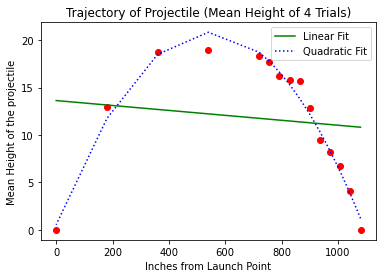

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean Height of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')
   
    plt.plot( distances, meanHeights, 'ro')
   
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    plt.plot(distances, altitudes, 'g', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(d2hs,trials)

A quick look at the plot on the right makes it quite clear that

* a **quadratic** fit is far better than a linear one

<b style="color:blue;font-size:120%">how bad a fit is the line and how good is the quadratic fit?</b>

### 2.1 Coefficient of Determination

Asking about **the goodness of a fit** is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, 

it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination(确定系数)</b>, often written as

$R^2$

Let:

* $y_i$ be the $i^{th}$ observed value,

* $p_i$ be the corresponding value predicted by model, and 

* $\mu$ be the **mean** of the observed values.

$$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$$

By comparing

<b>the estimation errors</b> (<b>RSS: residual sum of squares</b>) 

$\sum_{i}(y_i-p_i)^2$

with

<b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>), 

$\sum_{i}(y_i-\mu)^2$

$R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [6]:
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    # TSS: total sum of squares
    meanOfMeasured = sum(measured)/float(len(measured))
    variability = ((measured - meanOfMeasured)**2).sum()
    
    return 1 - estimateError/variability

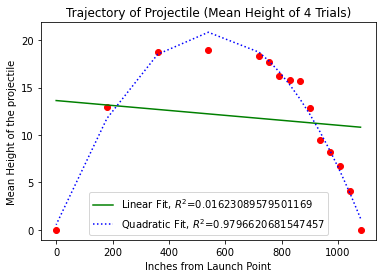

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean Height of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Mean Height of the projectile')
   
    plt.plot( distances, meanHeights, 'ro')
   
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    
    residuals1=rSquared(meanHeights, altitudes)
    plt.plot(distances, altitudes, 'g', label = 'Linear Fit, $R^2$='+str(residuals1))
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
             
    r2quad=rSquared(meanHeights, altitudes)          
    plt.plot(distances, altitudes, 'b:',label = 'Quadratic Fit, $R^2$='+str(r2quad))
    plt.legend()

processTrajectories(d2hs,trials)

This tells us that 

* 1 less than 2% of the variation in the measured data can be explained by the linear model,

* 2 more than **98%** of the  variation can be explained by the quadratic model

#### Matplotlib.pyplot: Formatting text: LaTeX

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.).

For example, `$R^2$`.

$R^2$

## 3 When Theory Is Missing

In an ideal world, we would run **a controlled experiment** (e.g., hang weights from a spring), study the results, and retrospectively formulate a model consistent
with those results.

Unfortunately, in many cases it is **impossible to run even one controlled experiment**

In such situations, one can **simulate a set of experiments** by dividing the existing data into **a training set** and **a holdout set**.

### How does one choose the training set?

1. One way to do this is to **randomly choose the samples** for the training set.

2.  A related but slightly different way to check a model is to train on **many randomly selected subsets** of the original data, and see how similar the models are to one another. 

If they are quite similar, than we can feel pretty good. This  approach is known as **cross validation**. 
